LOADING DEPENDENCIES

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import (
    train_test_split,
    cross_val_score, 
    GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV,
    Lasso,
    Ridge,
    ElasticNet
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    make_scorer,
    accuracy_score, 
    classification_report
)
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from imblearn.over_sampling import SMOTE
from collections import Counter
from tqdm import tqdm
import scipy.stats as sc
from scipy.stats import uniform
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

LOADING DATA

In [60]:
x_train_full=pd.read_csv("output/train_full.csv")
x_train=pd.read_csv("output/train.csv")
x_test=pd.read_csv("output/test.csv")
x_val=pd.read_csv("output/validation.csv")


y_train_full=pd.read_csv("output/target_train_full.csv")
y_train=pd.read_csv("output/target_train.csv")
y_test=pd.read_csv("output/target_test.csv")
y_val=pd.read_csv("output/target_validation.csv")

df_train=pd.read_csv("output/train_with_target.csv")
df_test=pd.read_csv("output/test_with_target.csv")

LOGISTIC REGRESSION- MODEL PREPARATION

In [64]:
#Skicit library
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_scaled= scaler.fit_transform(x_train)
x_val_scaled=scaler.fit_transform(x_val)
x_test_scaled = scaler.fit_transform(x_test)

In [65]:
print(f"x_train shape:{x_train_scaled.shape}, y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test_scaled.shape},y_test shape:{y_test.shape}")

x_train shape:(83123, 22), y_train shape:(83123, 1)
x_test shape:(25976, 22),y_test shape:(25976, 1)


In [66]:
lr = LogisticRegression(penalty=None)
print(x_train_scaled)

[[-0.9844217   0.47082738 -1.49296867 ... -0.44763458  0.45036545
   0.6983944 ]
 [ 1.01582482  0.47082738  0.66980642 ... -0.44763458  1.17194419
   0.7646354 ]
 [-0.9844217   0.47082738  0.66980642 ... -0.44763458 -0.47619884
  -0.03025683]
 ...
 [-0.9844217   0.47082738  0.66980642 ...  0.88156238  1.0003061
   0.49967134]
 [ 1.01582482  0.47082738  0.66980642 ... -0.44763458  1.69868397
   0.8308764 ]
 [-0.9844217   0.47082738  0.66980642 ... -0.44763458  1.69756047
   1.2945635 ]]


In [67]:
lr.fit(x_train_scaled , y_train.to_numpy().ravel())

LogisticRegression(penalty=None)

In [68]:
lr.score(x_train_scaled , y_train.to_numpy().ravel()) #score on train quite decent

0.8745834486243278

In [69]:
lr.score(x_test_scaled , y_test.to_numpy().ravel()) #pretty similar output 

0.8736141053279951

In [70]:
Y_pred = lr.predict(x_test_scaled)
data = pd.DataFrame({"Y_test" : y_test.Satisfaction , "Y_pred": Y_pred})
data.head(20) #still we can see even in this batch some FP and FN

,Y_test,Y_pred
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,1
8,1,1
9,0,0


In [71]:
#Statsmodel library
log_reg = sm.Logit(y_train.Satisfaction, x_train_scaled).fit() 

# Print the model summary
print(log_reg.summary()) #Flight distance (x21) as statistically insignificant

Optimization terminated successfully.
         Current function value: 0.345942
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                83123
Model:                          Logit   Df Residuals:                    83101
Method:                           MLE   Df Model:                           21
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.4945
Time:                        14:50:07   Log-Likelihood:                -28756.
converged:                       True   LL-Null:                       -56883.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0529      0.011      4.967      0.000       0.032       0.074
x2             0.8109      0.

In [72]:
print(classification_report(y_test,Y_pred)) #classification report

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [74]:
#Type I and II errors matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

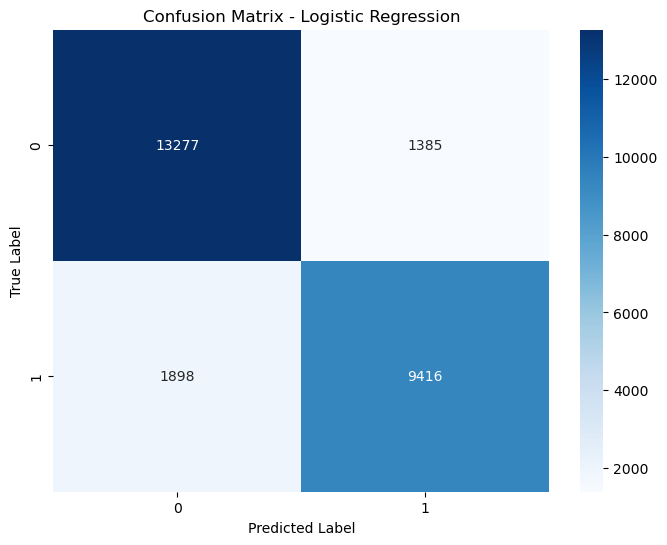

In [75]:
y_pred = lr.predict(x_test_scaled)
plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - Logistic Regression') #number of FN> number of FP: regarding satisfaction level we want more to avoid FP

In [76]:
#Feature selection for model based on correlation
feature_selection_with_corr = (df_train.corr(method="spearman")["satisfaction"]
  .apply(np.abs)
  .sort_values(ascending=False)
 )

feature_selection_with_corr

satisfaction                              1.000000
online_boarding                           0.550152
class                                     0.492967
type_of_travel                            0.449314
in_flight_entertainment                   0.400665
seat_comfort                              0.363986
on_board_service                          0.328122
leg_room_service                          0.317202
cleanliness                               0.306456
in_flight_wifi_service                    0.286471
baggage_handling                          0.271190
in_flight_service                         0.265880
flight_distance_log                       0.255021
check_in_service                          0.236024
food_and_drink                            0.209802
customer_type                             0.189022
ease_of_online_booking                    0.173773
age_zscore                                0.145128
arrival_delay_cut                         0.100194
departure_delay_cut            

Text(0.5, 1.0, 'Feature selection based on correlation')

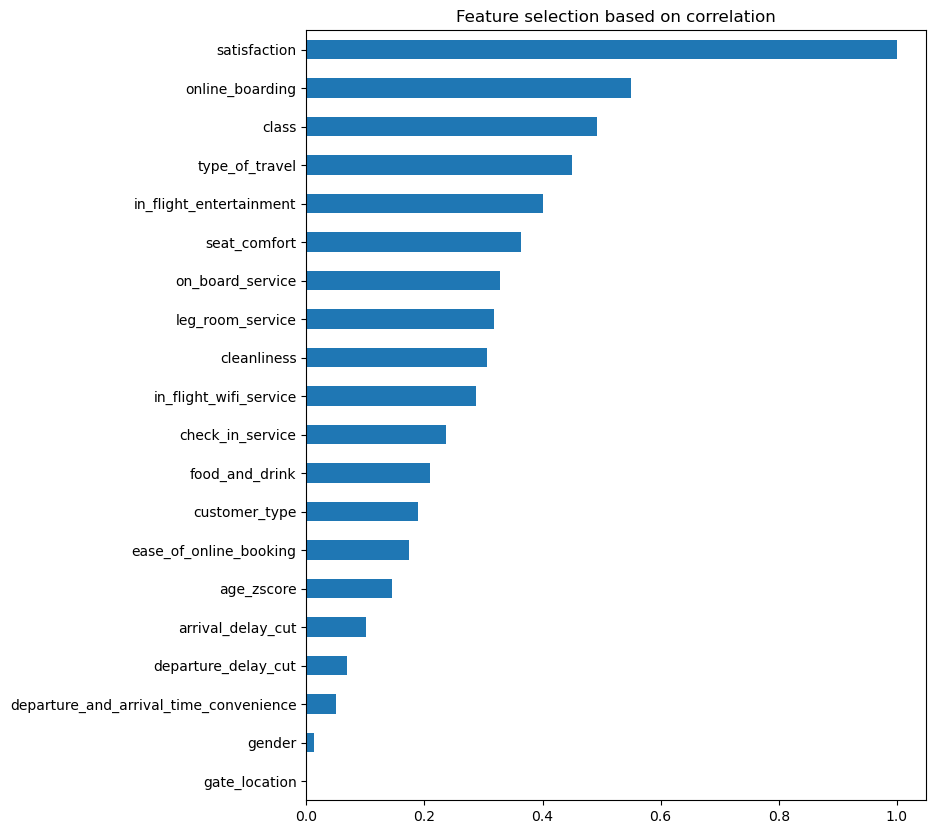

In [77]:
coef = pd.Series(feature_selection_with_corr)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.rcParams["figure.figsize"] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Feature selection based on correlation")

In [78]:
#Wrapper for Modelling and scoring
def logit_model_wrapper(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    X_test: pd.DataFrame,
    fit_intercept: bool=True,
) -> np.array :
    reg = LogisticRegression(fit_intercept=fit_intercept)
    reg.fit(X=X_train, y=y_train)
    pred = reg.predict(X_test)
    return pred.ravel()  


def scoring_wrapper(y_true: np.array, y_pred: np.array) -> dict:
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    fbeta_precision = metrics.fbeta_score(y_true, y_pred, beta=0.25) #more emphasis on precision
    fbeta_recall = metrics.fbeta_score(y_true, y_pred, beta=0.75) #more emphasis on recall
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "fbeta_precision": fbeta_precision, "fbeta_recall": fbeta_recall}

In [79]:
#Let's create some models (from containing least variables to all variables ~econometric GETS)
scores_on_train = dict()

for i in tqdm(range(1, 23)):
    feautres_i = feature_selection_with_corr.index[1 : 1 + i]
    pred = logit_model_wrapper(
        df_train[feautres_i], df_train[["satisfaction"]], df_train[feautres_i]
    )
    score = scoring_wrapper(df_train[["satisfaction"]].to_numpy().ravel(), pred)
    scores_on_train.update({f"top_{i}": score})

  0%|                                                                                           | 0/22 [00:00<?, ?it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  5%|███▊                                                                               | 1/22 [00:00<00:05,  4.04it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  9%|███████▌                                                                           | 2/22 [00:00<00:05,  3.74it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-ve

 86%|██████████████████████████████████████████████████████████████████████▊           | 19/22 [00:13<00:03,  1.19s/it]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 91%|██████████████████████████████████████████████████████████████████████████▌       | 20/22 [00:15

In [80]:
scores_on_train

{'top_1': {'accuracy': 0.787091931013243,
  'precision': 0.7227130070905498,
  'recall': 0.8269051735603139,
  'fbeta_precision': 0.7281096943520221,
  'fbeta_recall': 0.7570536579663839},
 'top_2': {'accuracy': 0.7888820449645827,
  'precision': 0.7358555845001629,
  'recall': 0.80145852728643,
  'fbeta_precision': 0.7394158476584586,
  'fbeta_recall': 0.7581978557325018},
 'top_3': {'accuracy': 0.8126443640283338,
  'precision': 0.7630623422979875,
  'recall': 0.8245112381965687,
  'fbeta_precision': 0.76642232257783,
  'fbeta_recall': 0.7840997050535506},
 'top_4': {'accuracy': 0.8350977825685247,
  'precision': 0.8114009704847972,
  'recall': 0.8080196834685464,
  'fbeta_precision': 0.8112012880761327,
  'fbeta_recall': 0.8101804520101489},
 'top_5': {'accuracy': 0.8351074068370804,
  'precision': 0.8113913062832468,
  'recall': 0.808064015604912,
  'fbeta_precision': 0.8111948249818711,
  'fbeta_recall': 0.8101903297211281},
 'top_6': {'accuracy': 0.8416230366492147,
  'precision'

In [81]:
#Firstly let's sort by precision
pd.DataFrame(scores_on_train).T.sort_values("precision") #best precision for 17, not all 22 variables- some of them must be excluded

,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_1,0.787092,0.722713,0.826905,0.728110,0.757054
top_2,0.788882,0.735856,0.801459,0.739416,0.758198
top_3,0.812644,0.763062,0.824511,0.766422,0.784100
top_5,0.835107,0.811391,0.808064,0.811195,0.810190
top_4,0.835098,0.811401,0.808020,0.811201,0.810180
top_6,0.841623,0.820402,0.813273,0.819979,0.817821
top_19,0.846387,0.822140,0.824600,0.822284,0.823024
top_21,0.847956,0.824925,0.824888,0.824922,0.824911
top_20,0.849399,0.825160,0.828745,0.825370,0.826447
top_22,0.848995,0.825573,0.826927,0.825653,0.826060


In [82]:
#How about comparing to other metrics?
display(pd.DataFrame(scores_on_train).T.sort_values("recall").tail(1)) #1 variable more to drop
display(pd.DataFrame(scores_on_train).T.sort_values("fbeta_precision").tail(1))
display(pd.DataFrame(scores_on_train).T.sort_values("fbeta_recall").tail(1)) #1 variable more to drop

,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_16,0.872363,0.866908,0.834087,0.864906,0.854799


,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_17,0.872247,0.866989,0.833666,0.864956,0.85469


,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_16,0.872363,0.866908,0.834087,0.864906,0.854799


In [83]:
#Now let's assess the metrics on test set
scores_on_test = dict()

for i in tqdm(range(1, 23)):
    feautres_i = feature_selection_with_corr.index[1 : 1 + i]
    pred = logit_model_wrapper(
        df_train[feautres_i], df_train[["satisfaction"]], df_test[feautres_i]
    )
    score = scoring_wrapper(df_test[["satisfaction"]].to_numpy().ravel(), pred)
    scores_on_test.update({f"top_{i}": score})

  0%|                                                                                           | 0/22 [00:00<?, ?it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  5%|███▊                                                                               | 1/22 [00:00<00:02,  9.19it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  9%|███████▌                                                                           | 2/22 [00:00<00:02,  7.95it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-ve

 86%|██████████████████████████████████████████████████████████████████████▊           | 19/22 [00:10<00:02,  1.06it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 91%|██████████████████████████████████████████████████████████████████████████▌       | 20/22 [00:11

In [84]:
scores_on_test

{'top_1': {'accuracy': 0.7860332614721282,
  'precision': 0.7236208236208236,
  'recall': 0.8231394732190207,
  'fbeta_precision': 0.7288039625472992,
  'fbeta_recall': 0.7565492321589883},
 'top_2': {'accuracy': 0.7893825069294733,
  'precision': 0.7404724668697013,
  'recall': 0.7951210889163868,
  'fbeta_precision': 0.7434783031434433,
  'fbeta_recall': 0.759258634077175},
 'top_3': {'accuracy': 0.8149060671388975,
  'precision': 0.7681338608638312,
  'recall': 0.8236697896411526,
  'fbeta_precision': 0.7711925462210236,
  'fbeta_recall': 0.7872425981117667},
 'top_4': {'accuracy': 0.8356944872189713,
  'precision': 0.8156244400645045,
  'recall': 0.8046667845147605,
  'fbeta_precision': 0.8149716175370971,
  'fbeta_recall': 0.8116454721166259},
 'top_5': {'accuracy': 0.8356944872189713,
  'precision': 0.8156244400645045,
  'recall': 0.8046667845147605,
  'fbeta_precision': 0.8149716175370971,
  'fbeta_recall': 0.8116454721166259},
 'top_6': {'accuracy': 0.8427394518016631,
  'preci

In [85]:
pd.DataFrame(scores_on_test).T.sort_values("precision") #similar results concerning maximization of precision

,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_1,0.786033,0.723621,0.823139,0.728804,0.756549
top_2,0.789383,0.740472,0.795121,0.743478,0.759259
top_3,0.814906,0.768134,0.823670,0.771193,0.787243
top_4,0.835694,0.815624,0.804667,0.814972,0.811645
top_5,0.835694,0.815624,0.804667,0.814972,0.811645
top_6,0.842739,0.824957,0.811031,0.824125,0.819889
top_19,0.847167,0.827389,0.820223,0.826964,0.824795
top_20,0.848822,0.828049,0.824023,0.827811,0.826595
top_22,0.848630,0.829025,0.821990,0.828608,0.826479
top_21,0.848783,0.829732,0.821372,0.829236,0.826703


In [86]:
#How about comparing to other metrics?
display(pd.DataFrame(scores_on_test).T.sort_values("recall").tail(1)) 
display(pd.DataFrame(scores_on_test).T.sort_values("fbeta_precision").tail(1))
display(pd.DataFrame(scores_on_test).T.sort_values("fbeta_recall").tail(1)) 
#on test set we obtain actually best metric value for 17 variables- we will apply this assumption in our model

,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_17,0.872267,0.870941,0.82968,0.8684,0.855622


,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_17,0.872267,0.870941,0.82968,0.8684,0.855622


,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_17,0.872267,0.870941,0.82968,0.8684,0.855622


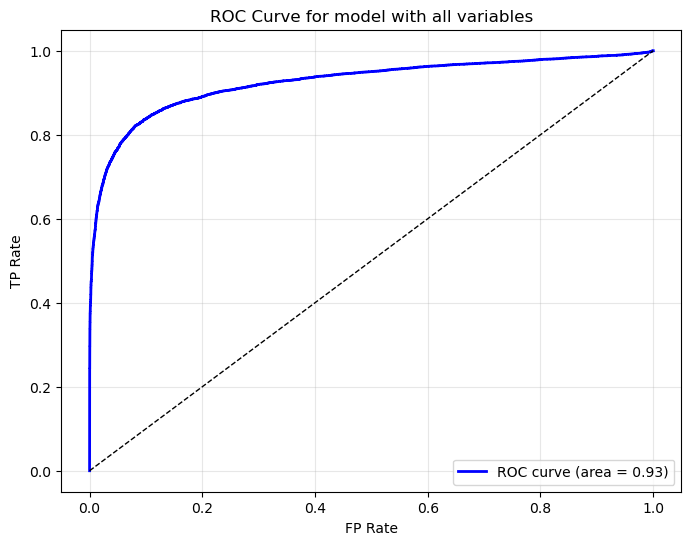

In [87]:
#Let's analyse the ROC curve for the logistic regression with all variables
y_proba = lr.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.Satisfaction, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for model with all variables')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

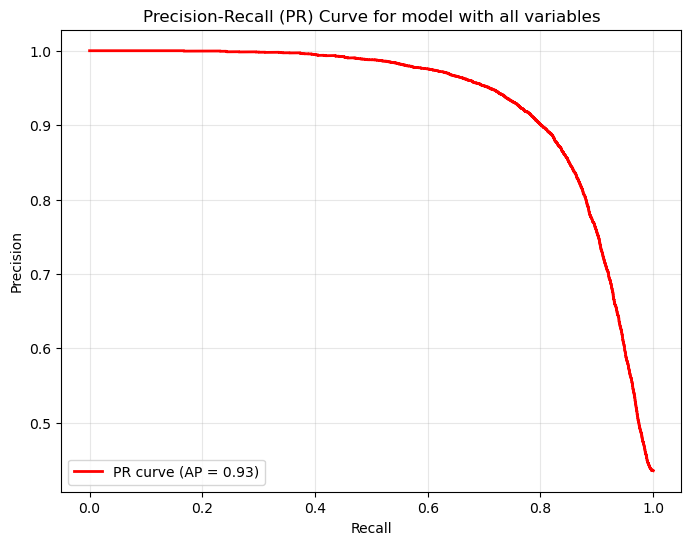

In [88]:
#Similarly for PR curve
precision, recall, thresholds = precision_recall_curve(y_test.Satisfaction, y_proba)
average_precision = average_precision_score(y_test.Satisfaction, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve for model with all variables')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

LOGISTIC REGRESSION- EVALUATION AND CROSS-VALIDATION

In [89]:
#Let's select the features basing on correlation value (17 out of 22)
feature_selection_with_corr = (df_train.corr(method="spearman")["satisfaction"]
  .apply(np.abs)
  .sort_values(ascending=False)
 )

feature_selection_with_corr

satisfaction                              1.000000
online_boarding                           0.550152
class                                     0.492967
type_of_travel                            0.449314
in_flight_entertainment                   0.400665
seat_comfort                              0.363986
on_board_service                          0.328122
leg_room_service                          0.317202
cleanliness                               0.306456
in_flight_wifi_service                    0.286471
baggage_handling                          0.271190
in_flight_service                         0.265880
flight_distance_log                       0.255021
check_in_service                          0.236024
food_and_drink                            0.209802
customer_type                             0.189022
ease_of_online_booking                    0.173773
age_zscore                                0.145128
arrival_delay_cut                         0.100194
departure_delay_cut            

In [90]:
#Here are 17 variables that we will include in our model, basing their impact on correlation with target
features = ['customer_type', 'type_of_travel', 'class', 'ease_of_online_booking',
       'check_in_service', 'online_boarding',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling', 'flight_distance_log', 'age_zscore']

In [91]:
#Standard K-Folds cross-validation
train_prec_list = list()
val_prec_list = list()

kf = KFold(n_splits=5, shuffle=False, random_state=None)
for train_index, val_index in kf.split(df_train.index.values):
    reg = LogisticRegression(fit_intercept=True)
    reg.fit(
        X=df_train[features].iloc[train_index],
        y=df_train[["satisfaction"]].iloc[train_index],
    )
    pred_train = reg.predict(df_train[features].iloc[train_index]).ravel()
    pred_val = reg.predict(df_train[features].iloc[val_index]).ravel()
    train_prec = scoring_wrapper(
        df_train[["satisfaction"]].iloc[train_index], pred_train
    ).get("precision")
    val_prec = scoring_wrapper(df_train[["satisfaction"]].iloc[val_index], pred_val).get(
        "precision"
    )
    train_prec_list.append(train_prec)
    val_prec_list.append(val_prec)
    print(
        "Train Precision:",
        train_prec,
        "Validation Precision:",
        val_prec,
    )

print(
    "avg Train Precision:", np.mean(train_prec_list), "avg Validation Precision", np.mean(val_prec_list)
)
#Average Precision is higher than the precision level for regression with 17 variables (=0.866989)

C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8663732343718535 Validation Precision: 0.8709602418042316


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8676321799207932 Validation Precision: 0.8684089867033471


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8678425504977845 Validation Precision: 0.86266589728794


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8664903403863845 Validation Precision: 0.8684912443465151


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.866737801361172 Validation Precision: 0.8654810761513908
avg Train Precision: 0.8670152213075975 avg Validation Precision 0.867201489258685


In [92]:
#Change of K-Folds parameters
train_prec_list = list()
val_prec_list = list()

kf = KFold(n_splits=10, shuffle=True, random_state=123)
for train_index, val_index in kf.split(df_train.index.values):
    reg = LogisticRegression(fit_intercept=True)
    reg.fit(
        X=df_train[features].iloc[train_index],
        y=df_train[["satisfaction"]].iloc[train_index],
    )
    pred_train = reg.predict(df_train[features].iloc[train_index]).ravel()
    pred_val = reg.predict(df_train[features].iloc[val_index]).ravel()
    train_prec = scoring_wrapper(
        df_train[["satisfaction"]].iloc[train_index], pred_train
    ).get("precision")
    val_prec = scoring_wrapper(df_train[["satisfaction"]].iloc[val_index], pred_val).get(
        "precision"
    )
    train_prec_list.append(train_prec)
    val_prec_list.append(val_prec)
    print(
        "Train Precision:",
        train_prec,
        "Valid Recall:",
        val_prec,
    )

print(
    "avg Train Precision:", np.mean(train_prec_list), "avg Val Precision", np.mean(val_prec_list)
) #even higher train Precision, but drop in validation Precision

C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.867588781223634 Valid Recall: 0.8618836176676794


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Precision: 0.86724049331963 Valid Recall: 0.8663822142375927


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8675637575291555 Valid Recall: 0.8645592985694509


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8668084779210128 Valid Recall: 0.8700616579127655


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8668114460909555 Valid Recall: 0.863204266172038


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8665694028513655 Valid Recall: 0.8726975985078107


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Precision: 0.8663933376041 Valid Recall: 0.8725199543899658


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.866724560686555 Valid Recall: 0.8667913063799954


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8674982108168899 Valid Recall: 0.8611176057984569


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8670690983817108 Valid Recall: 0.8713570127504554
avg Train Precision: 0.867026756642501 avg Val Precision 0.867057453238621


In [93]:
# Let's use scikit-learn ready-made function: cross_val_score
reg = LogisticRegression(fit_intercept=True)
scores = cross_val_score(estimator=reg,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring="precision", 
                         cv=10,
                         n_jobs=-1
                         )
scores

array([0.8681116 , 0.87316048, 0.86840302, 0.86461467, 0.86757255,
       0.86040609, 0.87328528, 0.86558891, 0.86532295, 0.86554239])

In [94]:
import statistics as s
s.mean(scores)

0.8672007936723072

In [95]:
#using ShuffleSplit
ss = ShuffleSplit(n_splits=20, test_size=0.2, random_state=123)
reg = LogisticRegression(fit_intercept=True)
scores = cross_val_score(estimator=reg,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring="precision", 
                         cv=ss,
                         n_jobs=-1
                         )
scores

array([0.86440678, 0.87231121, 0.86711763, 0.86519692, 0.86739055,
       0.86369383, 0.87288623, 0.86876282, 0.86716937, 0.86416916,
       0.86116607, 0.87008923, 0.8721709 , 0.86644579, 0.8642596 ,
       0.87349609, 0.86911542, 0.86925353, 0.86538908, 0.86708788])

In [96]:
s.mean(scores)

0.8675789047370825

In [97]:
#Now let's use scikit-learn ready-made function: cross_validate, so as to access the model by different metrics
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
reg = LogisticRegression(fit_intercept=True)
scores = cross_validate(estimator=reg,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores))

{'fit_time': array([2.02088475, 1.93841815, 1.62688947, 1.44945192, 1.79764104,
       1.67151308, 2.18909907, 2.17673016, 1.08614111, 1.1628592 ]), 'score_time': array([0.10515976, 0.11301541, 0.07595587, 0.08120608, 0.08596873,
       0.07704043, 0.07988572, 0.07662606, 0.03186631, 0.02166605]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82801418, 0.83506983,
       0.82664598, 0.83263135, 0.8308579 , 0.83750831, 0.84194192]), 'train_recall': array([0.83382592, 0.83439239, 0.83296389, 0.83387518, 0.83363298,
       0.83466739, 0.83375613, 0.83437184, 0.83387927, 0.83326355]), 'test_precision': array([0.8681116 , 0.87316048, 0.86840302, 0.86461467, 0.86757255,
       0.86040609, 0.87328528, 0.86558891, 0.86532295, 0.86554239]), 'train_precision': array([0.86700983, 0.86646717, 0.86689052, 0.86746093, 0.86709704,
       0.86777283, 0.86635956, 0.8671547 , 0.86699785, 0.86684602]), 'test_brier': array([-0.09727761, -0.09766586, -0.09572402, -0.1002718 , -0.09626197,
   

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,2.020885,0.105160,0.834441,0.833826,0.868112,0.867010,-0.097278,-0.097660,0.925664,0.925042
1,1.938418,0.113015,0.828457,0.834392,0.873160,0.866467,-0.097666,-0.097499,0.922222,0.925491
2,1.626889,0.075956,0.842420,0.832964,0.868403,0.866891,-0.095724,-0.097921,0.929772,0.924527
3,1.449452,0.081206,0.828014,0.833875,0.864615,0.867461,-0.100272,-0.097218,0.920181,0.925661
4,1.797641,0.085969,0.835070,0.833633,0.867573,0.867097,-0.096262,-0.097793,0.926699,0.924912
5,1.671513,0.077040,0.826646,0.834667,0.860406,0.867773,-0.101630,-0.097082,0.919651,0.925741
6,2.189099,0.079886,0.832631,0.833756,0.873285,0.866360,-0.095957,-0.097815,0.926479,0.924942
7,2.176730,0.076626,0.830858,0.834372,0.865589,0.867155,-0.100175,-0.097272,0.922438,0.925432
8,1.086141,0.031866,0.837508,0.833879,0.865323,0.866998,-0.096360,-0.097794,0.927822,0.924812
9,1.162859,0.021666,0.841942,0.833264,0.865542,0.866846,-0.095262,-0.097916,0.929233,0.924660


In [98]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.8670056458749235 avg Val Precision 0.8672007936723072


LOGISTIC REGRESSION - REGULARIZATION

1) Lasso (L1)

In [99]:
#Basic Lasso regularisation
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=123) 
lasso.fit(x_train_scaled, y_train.Satisfaction)

LogisticRegression(penalty='l1', random_state=123, solver='liblinear')

In [100]:
y_pred_lasso = lasso.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}") #drop in accuracy level
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87361411
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [101]:
#Hyperparameter tuning 
lasso_alpha= np.logspace(-4, 0, 10)
lasso_C = 1 / (2* lasso_alpha) #conversion for LogisticRegression, source: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Lasso.html
lasso_grid_search = LogisticRegressionCV(Cs=lasso_C, random_state=123, penalty='l1', solver='liblinear', cv=10, scoring='accuracy')
lasso_grid_search.fit(x_train_scaled, y_train.Satisfaction)
lasso_grid_val_pred = lasso_grid_search.predict(x_val_scaled)

print(f"Tuned Lasso Regularisation Accuracy: {accuracy_score(y_val.Satisfaction, lasso_grid_val_pred):.8f}") #slight drop in accuracy
print("\nLogistic Regression Grid Search Results:")
print(f"Best parameters: {lasso_grid_search.C_}") #high value of C = low value of alpha: insignificant impact of Lasso regularisation
print(f"Best cross-validation accuracy: {lasso_grid_search.score(x_train_scaled, y_train.Satisfaction):.8f}")

Tuned Lasso Regularisation Accuracy: 0.87175786

Logistic Regression Grid Search Results:
Best parameters: [1.3912797]
Best cross-validation accuracy: 0.87459548


In [102]:
#Cross-validation
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
scores = cross_validate(estimator=lasso,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores))

{'fit_time': array([40.47375894, 43.80278349, 43.25909352, 44.07204747, 44.38087678,
       38.4848361 , 37.3824439 , 37.80008316, 11.6394105 , 11.25574803]), 'score_time': array([0.17530394, 0.13176441, 0.14065957, 0.09709454, 0.08241916,
       0.15313363, 0.1725266 , 0.16659927, 0.03894591, 0.03344131]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82801418, 0.83551319,
       0.82664598, 0.83307471, 0.83107958, 0.83750831, 0.84194192]), 'train_recall': array([0.83377666, 0.83446628, 0.83298852, 0.83382592, 0.83363298,
       0.83469202, 0.83387927, 0.83444573, 0.83395316, 0.83336207]), 'test_precision': array([0.8681116 , 0.87336449, 0.86840302, 0.86461467, 0.86763352,
       0.86060466, 0.87334418, 0.86581986, 0.86532295, 0.86534518]), 'train_precision': array([0.86695862, 0.86656606, 0.86678285, 0.86734302, 0.86705262,
       0.86773178, 0.86633233, 0.86707614, 0.86698587, 0.86679304]), 'test_brier': array([-0.09728326, -0.09766807, -0.09572951, -0.10027305, -0.096

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,40.473759,0.175304,0.834441,0.833777,0.868112,0.866959,-0.097283,-0.097664,0.925663,0.925044
1,43.802783,0.131764,0.828457,0.834466,0.873364,0.866566,-0.097668,-0.097503,0.922231,0.925493
2,43.259094,0.140660,0.842420,0.832989,0.868403,0.866783,-0.095730,-0.097925,0.929776,0.924529
3,44.072047,0.097095,0.828014,0.833826,0.864615,0.867343,-0.100273,-0.097222,0.920182,0.925663
4,44.380877,0.082419,0.835513,0.833633,0.867634,0.867053,-0.096264,-0.097797,0.926700,0.924914
5,38.484836,0.153134,0.826646,0.834692,0.860605,0.867732,-0.101638,-0.097085,0.919650,0.925744
6,37.382444,0.172527,0.833075,0.833879,0.873344,0.866332,-0.095960,-0.097819,0.926483,0.924944
7,37.800083,0.166599,0.831080,0.834446,0.865820,0.867076,-0.100180,-0.097276,0.922436,0.925434
8,11.639410,0.038946,0.837508,0.833953,0.865323,0.866986,-0.096363,-0.097798,0.927822,0.924813
9,11.255748,0.033441,0.841942,0.833362,0.865345,0.866793,-0.095269,-0.097921,0.929239,0.924664


In [103]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.866962231014595 avg Val Precision 0.8672564122661589


2) Ridge (L2)

In [104]:
#Basic Ridge regularisation
ridge = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=123) 
ridge.fit(x_train_scaled, y_train.Satisfaction)

LogisticRegression(random_state=123)

In [105]:
y_pred_ridge = ridge.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87361411
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [106]:
#Hyperparameter tuning 
ridge_alpha= np.logspace(-4, 0, 10)
ridge_grid_search = LogisticRegressionCV(Cs=ridge_alpha, random_state=123, penalty='l2', solver='lbfgs', cv=10, scoring='accuracy')
ridge_grid_search.fit(x_train_scaled, y_train.Satisfaction)
ridge_grid_val_pred = ridge_grid_search.predict(x_val_scaled)

print(f"Tuned Ridge Regularisation Accuracy: {accuracy_score(y_val.Satisfaction, lasso_grid_val_pred):.8f}")  #also drop in accuracy
print("\nLogistic Regression Grid Search Results:")
print(f"Best parameters: {ridge_grid_search.C_}") # low value of alpha- L2 isn't beneficial for our model
print(f"Best cross-validation accuracy: {ridge_grid_search.score(x_train_scaled, y_train.Satisfaction):.8f}")

Tuned Ridge Regularisation Accuracy: 0.87175786

Logistic Regression Grid Search Results:
Best parameters: [0.00215443]
Best cross-validation accuracy: 0.87513685


In [107]:
#Cross-validation
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
scores = cross_validate(estimator=ridge,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores))

{'fit_time': array([2.02802253, 1.50087166, 1.73031712, 1.36762071, 2.31392407,
       1.70877552, 2.09963822, 2.09455109, 1.0877161 , 1.26038742]), 'score_time': array([0.09164238, 0.09609795, 0.08489966, 0.10144973, 0.07638741,
       0.08800745, 0.08559489, 0.09166026, 0.03165078, 0.02272201]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82801418, 0.83506983,
       0.82664598, 0.83263135, 0.8308579 , 0.83750831, 0.84194192]), 'train_recall': array([0.83382592, 0.83439239, 0.83296389, 0.83387518, 0.83363298,
       0.83466739, 0.83375613, 0.83437184, 0.83387927, 0.83326355]), 'test_precision': array([0.8681116 , 0.87316048, 0.86840302, 0.86461467, 0.86757255,
       0.86040609, 0.87328528, 0.86558891, 0.86532295, 0.86554239]), 'train_precision': array([0.86700983, 0.86646717, 0.86689052, 0.86746093, 0.86709704,
       0.86777283, 0.86635956, 0.8671547 , 0.86699785, 0.86684602]), 'test_brier': array([-0.09727761, -0.09766586, -0.09572402, -0.1002718 , -0.09626197,
   

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,2.028023,0.091642,0.834441,0.833826,0.868112,0.867010,-0.097278,-0.097660,0.925664,0.925042
1,1.500872,0.096098,0.828457,0.834392,0.873160,0.866467,-0.097666,-0.097499,0.922222,0.925491
2,1.730317,0.084900,0.842420,0.832964,0.868403,0.866891,-0.095724,-0.097921,0.929772,0.924527
3,1.367621,0.101450,0.828014,0.833875,0.864615,0.867461,-0.100272,-0.097218,0.920181,0.925661
4,2.313924,0.076387,0.835070,0.833633,0.867573,0.867097,-0.096262,-0.097793,0.926699,0.924912
5,1.708776,0.088007,0.826646,0.834667,0.860406,0.867773,-0.101630,-0.097082,0.919651,0.925741
6,2.099638,0.085595,0.832631,0.833756,0.873285,0.866360,-0.095957,-0.097815,0.926479,0.924942
7,2.094551,0.091660,0.830858,0.834372,0.865589,0.867155,-0.100175,-0.097272,0.922438,0.925432
8,1.087716,0.031651,0.837508,0.833879,0.865323,0.866998,-0.096360,-0.097794,0.927822,0.924812
9,1.260387,0.022722,0.841942,0.833264,0.865542,0.866846,-0.095262,-0.097916,0.929233,0.924660


In [108]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.8670056458749235 avg Val Precision 0.8672007936723072


3) Elastic Net

In [109]:
#Basic Elastic Net regularisation
elasticnet = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.1,0.2,0.5], Cs=[0.1,0.5,1], random_state=123) 
elasticnet.fit(x_train_scaled, y_train.Satisfaction)

LogisticRegressionCV(Cs=[0.1, 0.5, 1], l1_ratios=[0.1, 0.2, 0.5],
                     penalty='elasticnet', random_state=123, solver='saga')

In [110]:
y_pred_elasticnet = elasticnet.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87361411
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [111]:
#Hyperparameter tuning 
elasticnet_alpha= np.logspace(-4, 0, 10)
elasticnet_l1_ratio= [0.1, 0.25, 0.5, 0.75, 0.9]
elasticnet_grid_search = LogisticRegressionCV(Cs=elasticnet_alpha, random_state=123, penalty='elasticnet', l1_ratios= elasticnet_l1_ratio, solver='saga', cv=10, scoring='accuracy')
elasticnet_grid_search.fit(x_train_scaled, y_train.Satisfaction)
elasticnet_grid_val_pred = elasticnet_grid_search.predict(x_val_scaled)

print(f"Tuned Elastic Net Regularisation Accuracy: {accuracy_score(y_val.Satisfaction, elasticnet_grid_val_pred):.8f}") 
print("\nLogistic Regression Grid Search Results:")
print("Best C value (inverse regularization strength): ", elasticnet_grid_search.C_)
print("Best l1_ratio (mix of L1 and L2 regularization): ", elasticnet_grid_search.l1_ratio_)
print(f"Best cross-validation accuracy: {elasticnet_grid_search.score(x_train_scaled, y_train.Satisfaction):.8f}")

Tuned Elastic Net Regularisation Accuracy: 0.87233531

Logistic Regression Grid Search Results:
Best C value (inverse regularization strength):  [0.00215443]
Best l1_ratio (mix of L1 and L2 regularization):  [0.75]
Best cross-validation accuracy: 0.87534136


In [112]:
#Cross-validation
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
scores = cross_validate(estimator=elasticnet,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores)) 

{'fit_time': array([57.57196569, 52.44554496, 53.08691597, 55.58774376, 57.39397001,
       59.03281546, 58.33621955, 53.50697422, 26.97675776, 25.8885963 ]), 'score_time': array([0.06313467, 0.07774115, 0.1230731 , 0.09897494, 0.05186367,
       0.04059076, 0.0517292 , 0.06784201, 0.02889872, 0.05504799]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82823582, 0.83506983,
       0.82664598, 0.83263135, 0.8308579 , 0.83750831, 0.84194192]), 'train_recall': array([0.83380129, 0.83439239, 0.83296389, 0.83392444, 0.83360835,
       0.83464276, 0.83387927, 0.83434722, 0.83385464, 0.83341132]), 'test_precision': array([0.86831181, 0.87336449, 0.86840302, 0.86424607, 0.8677724 ,
       0.86060466, 0.87328528, 0.86558891, 0.86532295, 0.86455725]), 'train_precision': array([0.86707305, 0.86644501, 0.86689052, 0.86777897, 0.86716028,
       0.86774722, 0.86635449, 0.8671735 , 0.86701665, 0.86673326]), 'test_brier': array([-0.09727274, -0.09766555, -0.09572105, -0.10029927, -0.096

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,57.571966,0.063135,0.834441,0.833801,0.868312,0.867073,-0.097273,-0.097655,0.925663,0.925043
1,52.445545,0.077741,0.828457,0.834392,0.873364,0.866445,-0.097666,-0.097500,0.922224,0.925491
2,53.086916,0.123073,0.842420,0.832964,0.868403,0.866891,-0.095721,-0.097917,0.929771,0.924528
3,55.587744,0.098975,0.828236,0.833924,0.864246,0.867779,-0.100299,-0.097239,0.920183,0.925663
4,57.393970,0.051864,0.835070,0.833608,0.867772,0.867160,-0.096259,-0.097790,0.926700,0.924912
5,59.032815,0.040591,0.826646,0.834643,0.860605,0.867747,-0.101629,-0.097082,0.919649,0.925739
6,58.336220,0.051729,0.832631,0.833879,0.873285,0.866354,-0.095961,-0.097817,0.926473,0.924939
7,53.506974,0.067842,0.830858,0.834347,0.865589,0.867174,-0.100173,-0.097270,0.922436,0.925432
8,26.976758,0.028899,0.837508,0.833855,0.865323,0.867017,-0.096358,-0.097792,0.927822,0.924811
9,25.888596,0.055048,0.841942,0.833411,0.864557,0.866733,-0.095291,-0.097941,0.929236,0.924664


In [113]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.8670372959309764 avg Val Precision 0.8671456840169546


Final conclusion: the usage of Lasso/Ridge/Elastic Net regularisation leads to decrease in accuracy (with similar levels of Precision), therefore it shouldn't be applied to this model; The best logistic regression was acquired by reducing the amount of variables to 17

In [114]:
#Datasets for tuned logistic regression
x_train_17=pd.DataFrame(x_train[features])
x_test_17=pd.DataFrame(x_test[features])
x_val_17=pd.DataFrame(x_val[features])

In [123]:
#Saving prepared datasets
x_train_17.to_csv("output/train_logistic.csv", index=False)
x_test_17.to_csv("output/test_logistic.csv", index=False)
x_val_17.to_csv("output/validation_logistic.csv", index=False)

In [116]:
#Skicit library
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_17_scaled= scaler.fit_transform(x_train_17)
x_val_17_scaled=scaler.fit_transform(x_val_17)
x_test_17_scaled = scaler.fit_transform(x_test_17)

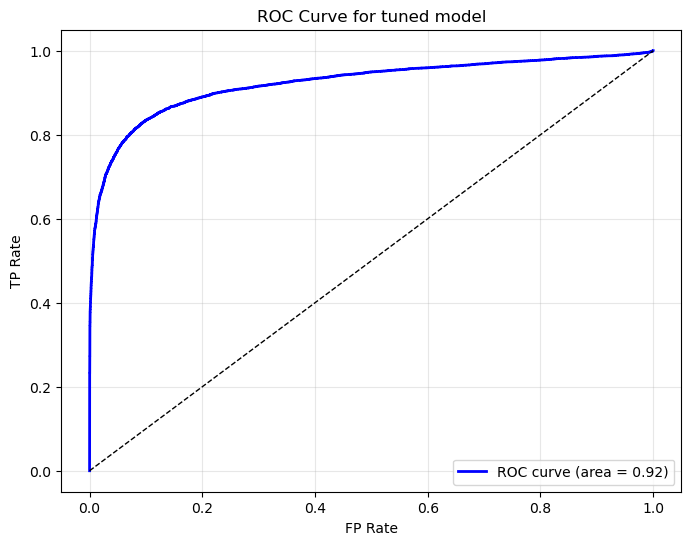

In [122]:
#Let's analyse the ROC curve for the logistic regression with 17 parameters
y_proba = lr.predict_proba(x_test_17_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.Satisfaction, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for tuned model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show() #actually lower value of ROC under the curve area